Jupyter workbook for TSM4 masters project

In [1]:
import os

def get_wav_files_and_labels(base_dir):
    data = []
    # base_dir should be the path containing 'insular' and 'pelagic' folders
    for label in ['Insular', 'Pelagic']:
        label_path = os.path.join(base_dir, label)
        # Walk recursively through label folder
        for root, dirs, files in os.walk(label_path):
            # Only process files inside folders named exactly "Raven wave file clips"
            if os.path.basename(root) == "Raven wave file clips":
                for f in files:
                    if f.lower().endswith('.wav'):
                        full_path = os.path.join(root, f)
                        data.append((full_path, label))
    return data

# print number of wav files found
base_dir = '../data'  
wav_label_pairs = get_wav_files_and_labels(base_dir)
print(f"Found {len(wav_label_pairs)} wav files.")


Found 2179 wav files.


In [2]:
wav_label_pairs

[('../data/Insular/Sette_AC_338/Raven wave file clips/20171008_205743_sel_29.wav',
  'Insular'),
 ('../data/Insular/Sette_AC_338/Raven wave file clips/20171008_205743_sel_15.wav',
  'Insular'),
 ('../data/Insular/Sette_AC_338/Raven wave file clips/20171008_205743_sel_01.wav',
  'Insular'),
 ('../data/Insular/Sette_AC_338/Raven wave file clips/20171008_205443_sel_09.wav',
  'Insular'),
 ('../data/Insular/Sette_AC_338/Raven wave file clips/20171008_210443_sel_02.wav',
  'Insular'),
 ('../data/Insular/Sette_AC_338/Raven wave file clips/20171008_204443_sel_13.wav',
  'Insular'),
 ('../data/Insular/Sette_AC_338/Raven wave file clips/20171008_204443_sel_07.wav',
  'Insular'),
 ('../data/Insular/Sette_AC_338/Raven wave file clips/20171008_204643_sel_20.wav',
  'Insular'),
 ('../data/Insular/Sette_AC_338/Raven wave file clips/20171008_204643_sel_08.wav',
  'Insular'),
 ('../data/Insular/Sette_AC_338/Raven wave file clips/20171008_204643_sel_09.wav',
  'Insular'),
 ('../data/Insular/Sette_AC_33

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm  # optional for progress bar

In [ ]:
def wav_to_spectrogram_scipy(wav_path, n_fft=8192):
    sample_rate, samples = wavfile.read(wav_path)
    frequencies, times, Sxx = signal.spectrogram(samples, sample_rate, nperseg=n_fft)
    # Sxx is power spectral density, take log to get dB scale
    Sxx_log = np.log(Sxx + 1e-10)  # add small number to avoid log(0)
    # Normalize to 0-1 range
    Sxx_norm = (Sxx_log - Sxx_log.min()) / (Sxx_log.max() - Sxx_log.min())
    return Sxx_norm


spectrograms = []
labels = []

for wav_path, label in tqdm(wav_label_pairs):
    spect = wav_to_spectrogram_scipy(wav_path, n_fft=8192)
    spectrograms.append(spect)
    labels.append(label)

# resize all spectrograms to a fixed shape for ML
from skimage.transform import resize

target_shape = (128, 128)
spectrograms_resized = []

for i, s in enumerate(spectrograms):
    try:
        resized = resize(s, target_shape, mode='constant', anti_aliasing=True)
        if resized.shape != target_shape:
            print(f"Warning: Resized shape mismatch at index {i}, got {resized.shape}")
            continue
        spectrograms_resized.append(resized)
    except Exception as e:
        print(f"Error resizing spectrogram at index {i}: {e}")

        
# Encode labels to integers
label_to_idx = {'Insular': 0, 'Pelagic': 1}
y = np.array([label_to_idx[l] for l in labels])


  5%|▍         | 105/2179 [00:05<01:26, 24.07it/s]/var/folders/bt/njml01qd5wzbf3cq1pr211xw0000gp/T/ipykernel_8253/4199670504.py:3: UserWarning: nperseg = 8192 is greater than input length  = 5, using nperseg = 5
  frequencies, times, Sxx = signal.spectrogram(samples, sample_rate, nperseg=n_fft)
 31%|███       | 669/2179 [00:39<01:14, 20.35it/s]/var/folders/bt/njml01qd5wzbf3cq1pr211xw0000gp/T/ipykernel_8253/4199670504.py:3: UserWarning: nperseg = 8192 is greater than input length  = 3, using nperseg = 3
  frequencies, times, Sxx = signal.spectrogram(samples, sample_rate, nperseg=n_fft)
 42%|████▏     | 913/2179 [00:54<01:25, 14.88it/s]/var/folders/bt/njml01qd5wzbf3cq1pr211xw0000gp/T/ipykernel_8253/4199670504.py:3: UserWarning: nperseg = 8192 is greater than input length  = 6, using nperseg = 6
  frequencies, times, Sxx = signal.spectrogram(samples, sample_rate, nperseg=n_fft)
 55%|█████▍    | 1193/2179 [01:31<02:09,  7.64it/s]/var/folders/bt/njml01qd5wzbf3cq1pr211xw0000gp/T/ipykernel_82

AttributeError: 'list' object has no attribute 'shape'

Spectrogram dataset shape: (2000, 128, 128)
Labels shape: (2179,)


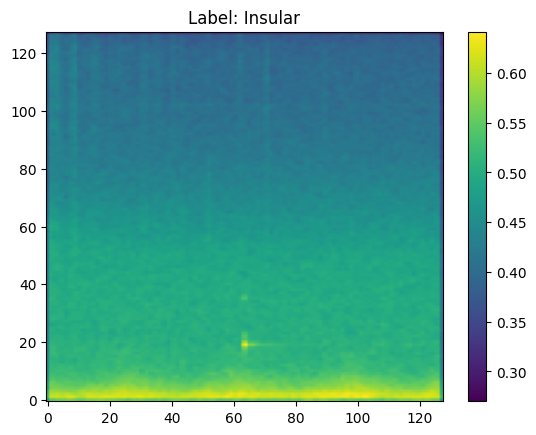

In [12]:
spectrograms_resized = np.array(spectrograms_resized)
print(f"Spectrogram dataset shape: {spectrograms_resized.shape}")
print(f"Labels shape: {y.shape}")

# To visualize one spectrogram
import matplotlib.pyplot as plt
plt.imshow(spectrograms_resized[0], aspect='auto', origin='lower')
plt.title(f"Label: {labels[0]}")
plt.colorbar()
plt.show()

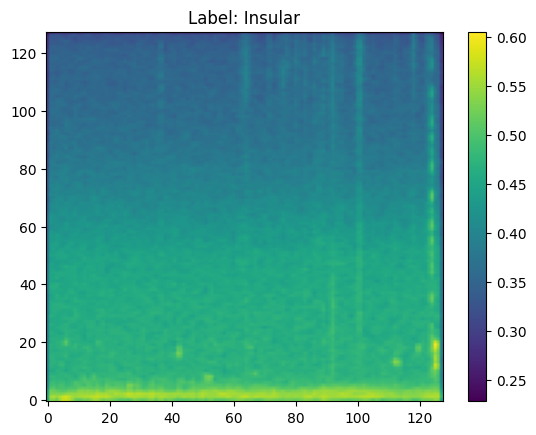

In [13]:
plt.imshow(spectrograms_resized[150], aspect='auto', origin='lower')
plt.title(f"Label: {labels[150]}")
plt.colorbar()
plt.show()

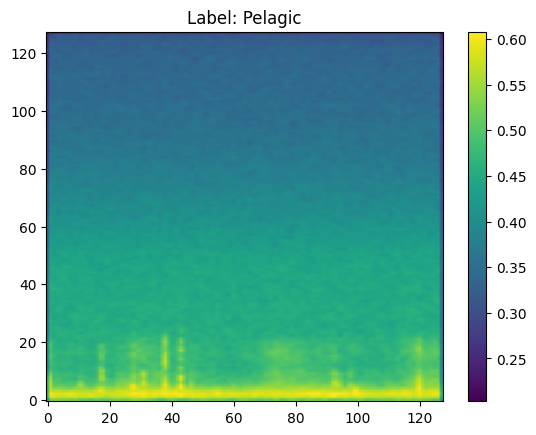

In [14]:
plt.imshow(spectrograms_resized[1000], aspect='auto', origin='lower')
plt.title(f"Label: {labels[1000]}")
plt.colorbar()
plt.show()